In [1]:
# Installing necessary Libraries that are essential 
# !pip install pandas 
# !pip install numpy 
# !pip install matplotlib 
# !pip install searborn 
# !pip install math 
# !pip install warnings 

# Importing necessary Libraries that are essential for the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
import math
from sklearn.metrics import plot_confusion_matrix
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
#EDA FOR APPLICATION RECORD DATASET

#loading and displaying few records of the application dataset
data = pd.read_csv("application_record.csv")
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
#checking for rows * columns in the dataset
data.shape

(438557, 18)

In [4]:
#checking if there are any outliers or suspicious data in the given dataset
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [5]:
#finding the total no. of NULL Values on the columns
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
#checking if there are any NULL Values in the columns
data.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [7]:
# Head of the missing column
data.loc[:10,data.isnull().any()]

,OCCUPATION_TYPE
0,NaN
1,NaN
2,Security staff
3,Sales staff
4,Sales staff
5,Sales staff
6,Sales staff
7,NaN
8,NaN
9,NaN


In [8]:
#checking if there any duplicate records in the dataset
data[data.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


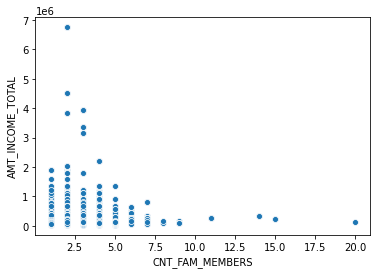

In [9]:
import seaborn as sns
sns.scatterplot(x="CNT_FAM_MEMBERS", y="AMT_INCOME_TOTAL", data=data);

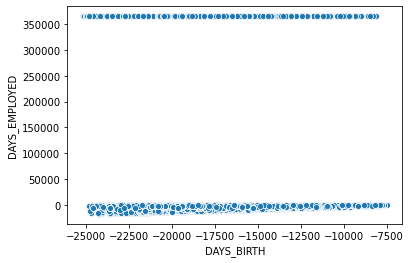

In [10]:
sns.scatterplot(x="DAYS_BIRTH", y="DAYS_EMPLOYED", data=data);

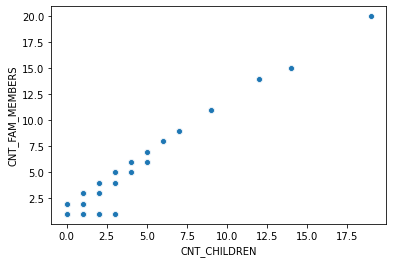

In [11]:
sns.scatterplot(x="CNT_CHILDREN", y="CNT_FAM_MEMBERS", data=data);

In [12]:
data.corr(method ='pearson')

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000


In [13]:
data['FLAG_MOBIL'].unique()

array([1])

In [14]:
data.drop(['FLAG_MOBIL'],inplace = True,axis = 1)

In [15]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,0,0,0,NaN,2.0


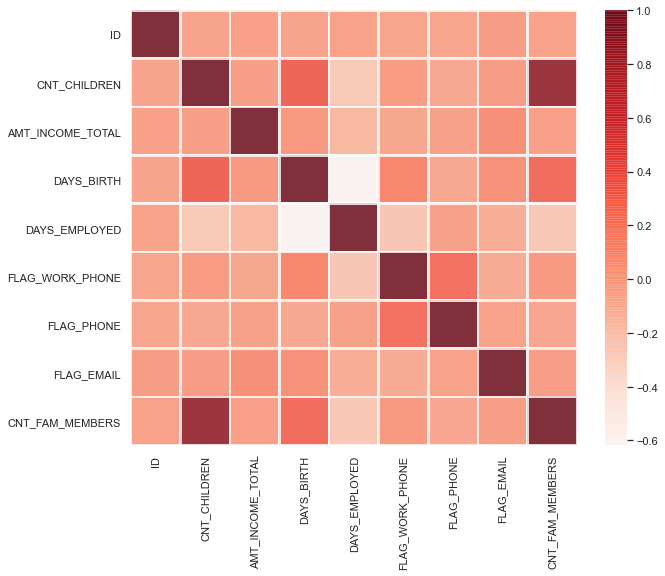

In [16]:
#correlation plot (pearson correlatrion)

sns.set()
corr = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, xticklabels = corr.columns.values, 
            yticklabels = corr.columns.values,
            cmap = "Reds", linewidths = 1.50, alpha = 0.8
           )
plt.show()

In [17]:
#evaluating gender proportions
eval_Gender = data["CODE_GENDER"].value_counts(normalize = True)
eval_Gender

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

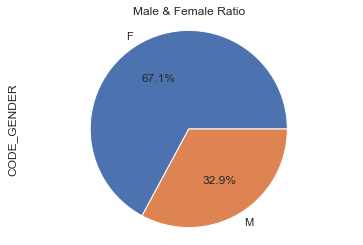

In [18]:
#plotting the gender evaluations using a pie chart
eval_Gender.plot.pie(autopct='%1.1f%%')
plt.title('Male & Female Ratio')
plt.axis('equal')
plt.show()

In [19]:
#evaluating housing type proportions
evaluating_housing_type = data["NAME_HOUSING_TYPE"].value_counts(normalize = True)
evaluating_housing_type

House / apartment      0.898016
With parents           0.043499
Municipal apartment    0.032411
Rented apartment       0.013622
Office apartment       0.008943
Co-op apartment        0.003509
Name: NAME_HOUSING_TYPE, dtype: float64

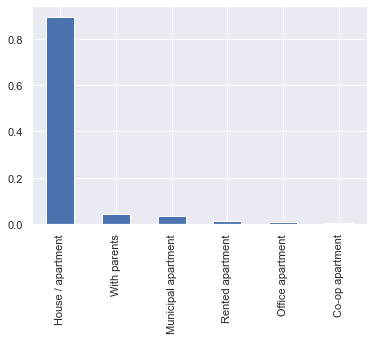

In [20]:
#plotting the housing type evaluations using a bar chart


        
evaluating_housing_type.plot.bar()

plt.show()

In [21]:
#housing owners proportions with respect to gender type
hous_ownership = data.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID': 'count'})
hous_ownership

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [22]:
#percentage of housing owners

hous_ownership_percent = hous_ownership.groupby(level=0).apply(lambda x:100 * x/ float(x.sum()))
hous_ownership_percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

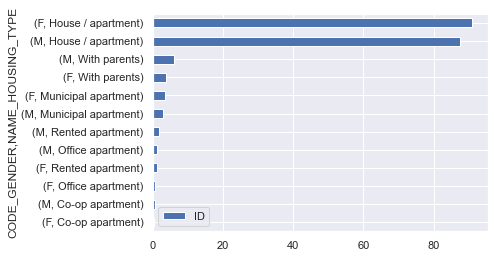

In [23]:
#plotting a bar graph for housing owners with respect to gender
hous_ownership_percent.sort_values(by = 'ID').plot.barh()
plt.show()

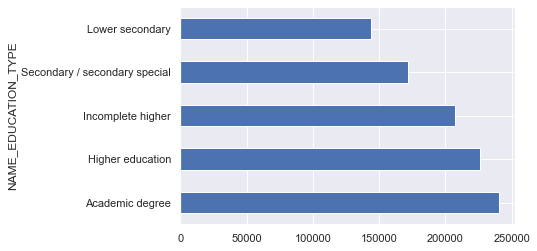

In [24]:
#plotting a bar graph to know the relation between education and income
data.groupby(["NAME_EDUCATION_TYPE"])["AMT_INCOME_TOTAL"].mean().sort_values(ascending=False).plot.barh()
plt.show()

In [25]:
#EDA FOR CREDIT RECORD DATASET

#loading and displaying few records of the credit record dataset
creditData = pd.read_csv("credit_record.csv")
creditData.head()



,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [26]:
#checking for rows * columns in the dataset
creditData.shape

(1048575, 3)

In [27]:
#checking if there are any outliers or suspicious data in the given dataset
creditData.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


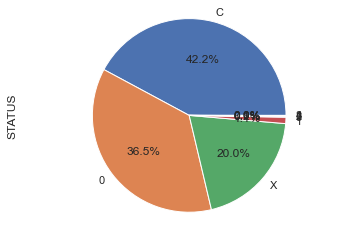

In [28]:
#using a pie graph to visulize the count of the status types
creditData["STATUS"].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()

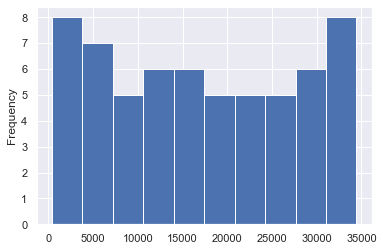

In [29]:
#using a histogram to visualize the freq distribution of the months balance
creditData["MONTHS_BALANCE"].value_counts().plot.hist()
plt.show()

In [30]:
#checking the credit card tenurity for a cardholder with respect to their customer ID
creditData['MONTHS_BALANCE'] = creditData['MONTHS_BALANCE'].apply(lambda x : x*(-1))
card_Holder_Tenure = pd.DataFrame(creditData.groupby('ID').agg({'MONTHS_BALANCE' : max}))
card_Holder_Tenure.rename(columns = {'MONTHS_BALANCE':'CUSTOMER_FOR_MONTHS'},inplace = True)
card_Holder_Tenure.head()

,CUSTOMER_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


In [31]:
#MERGING APPLICATION RECORDS AND TENURITY OF EACH CARDHOLDER RECORDS DATASET


cust_data = pd.merge(data, card_Holder_Tenure,on = 'ID',how = 'inner')
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,26


In [32]:
#checking for rows * columns in the dataset
cust_data.shape

(36457, 18)

In [33]:
#assigning customer who has status of either C or X with value -1
creditData['STATUS'][creditData["STATUS"] == 'C'] = -1
creditData['STATUS'][creditData["STATUS"] == 'X'] = -1
creditData.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [34]:
creditData['STATUS'] = creditData['STATUS'].apply(lambda x : int(x))

In [35]:
creditData.sort_values(by = 'STATUS',ascending = False,inplace = True)
creditData.drop_duplicates(subset = ['ID'],inplace = True)
creditData.shape

(45985, 3)

In [36]:
#if a cardholder is not making his payments and is indebted to bank since more than 30 days consider him as a nonpayer.
#here cardholder with status of >-1 are non payers of the bank
creditData['target'] = creditData["STATUS"].apply(lambda x : 0 if x>-1 else 1)
creditData.drop(['STATUS','MONTHS_BALANCE'],axis = 1,inplace = True)
creditData.head()

,ID,target
372050,5042064,0
307952,5029028,0
723708,5097065,0
942335,5135344,0
832456,5117313,0


In [37]:
#getting count of the Target values
creditData["target"].value_counts()

0    40032
1     5953
Name: target, dtype: int64

In [38]:
#NOW WE WILL MERGE CUSTOMER DATA WITH THE CREDIT CARD RECORDS DATASETS
# simple random sampling (both under and oversampling) is required here to reduce bias
cust_data = pd.merge(cust_data, creditData, on = "ID", how = "inner")
cust_data.shape

(36457, 19)

In [39]:
#loading and displaying few records of the credit record dataset
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,26,1


In [40]:
#reading all the names of the columns
cust_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUSTOMER_FOR_MONTHS', 'target'],
      dtype='object')

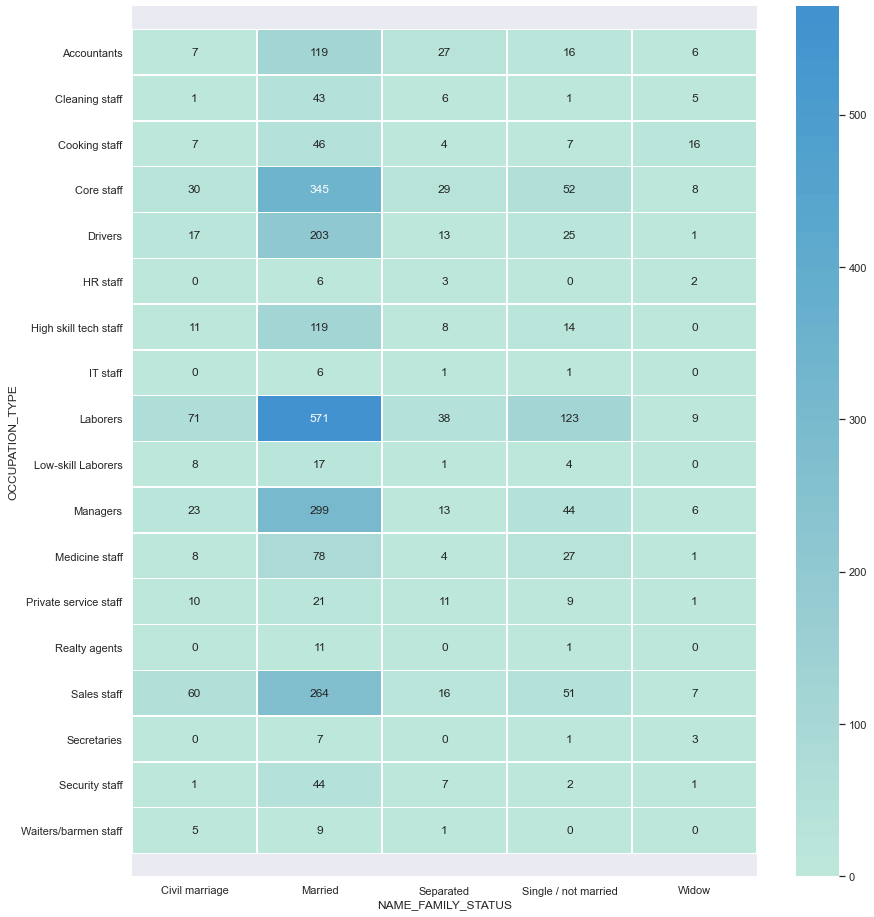

In [41]:
#if any duplicate values are found we need to drop them
#Pivot table to build a heatmap between the occupation type and family status
pivot_table1 = pd.pivot_table(data = cust_data, index = ['OCCUPATION_TYPE'], columns = ['NAME_FAMILY_STATUS'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[14, 16])
hm = sns.heatmap(data = pivot_table1, annot = True, fmt='.0f', linewidths=.4, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

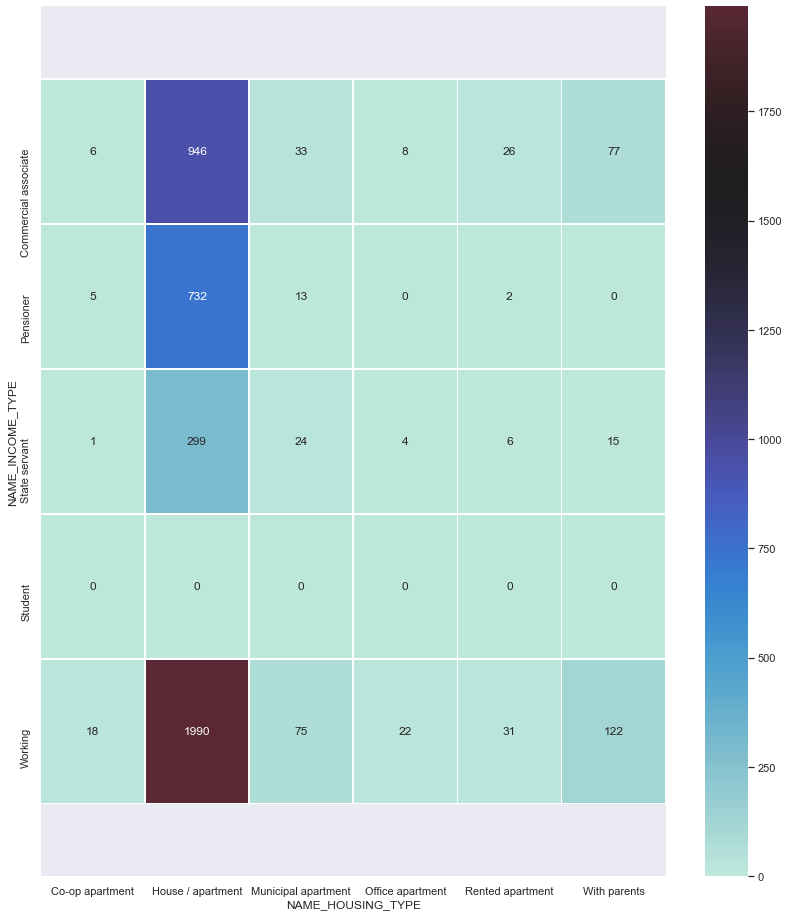

In [42]:
#Pivot table to build a heatmap between the income type and housing type
pivot_table2 = pd.pivot_table(data = cust_data, index = ['NAME_INCOME_TYPE'], columns = ['NAME_HOUSING_TYPE'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[14,16])
hm = sns.heatmap(data = pivot_table2, annot = True, fmt='.0f', linewidths=.4, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [43]:
#customer data info
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  OCCUPATION_TYPE      25134 non-null 

In [44]:
#checking if there are any NULL Values in the columns
cust_data.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
CUSTOMER_FOR_MONTHS    False
target                 False
dtype: bool

In [45]:
# Converting Binary Categorical Columns to have Integer value
cust_data['CODE_GENDER'] = cust_data["CODE_GENDER"].apply(lambda x : 0 if x == 'M' else 1)
cust_data['FLAG_OWN_CAR'] = cust_data["FLAG_OWN_CAR"].apply(lambda x : 0 if x == 'N' else 1)
cust_data['FLAG_OWN_REALTY'] = cust_data["FLAG_OWN_REALTY"].apply(lambda x : 0 if x == 'N' else 1)

cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,15,0
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,14,0
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,29,0
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,4,0
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,26,1


In [46]:
eval_car = data["FLAG_OWN_CAR"].value_counts(normalize = True)
eval_car

N    0.628103
Y    0.371897
Name: FLAG_OWN_CAR, dtype: float64

In [47]:
eval_realty = data["FLAG_OWN_REALTY"].value_counts(normalize = True)
eval_realty

Y    0.693351
N    0.306649
Name: FLAG_OWN_REALTY, dtype: float64

In [48]:
eval_code = data["CODE_GENDER"].value_counts(normalize = True)
eval_code

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

In [49]:
cols_to_norm = ['AMT_INCOME_TOTAL']
cust_data[cols_to_norm] = cust_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [50]:
cust_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,15,0
1,5008805,0,1,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,14,0
2,5008806,0,1,1,0,0.055233,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,29,0
3,5008808,1,0,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,4,0
4,5008809,1,0,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,1,1,0,0.186047,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,Managers,2.0,11,0
36453,5149834,1,0,1,0,0.084302,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,23,0
36454,5149838,1,0,1,0,0.084302,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,32,0
36455,5150049,1,0,1,0,0.165698,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,0,0,0,Sales staff,2.0,9,0


In [51]:
#clear description of the entire customer data
cust_data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.670105,0.379708,0.672189,0.430315,0.103156,-15975.173382,59262.935568,0.225526,0.294813,0.089722,2.198453,26.164193,0.122199
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,0.065755,4200.549944,137651.334859,0.417934,0.455965,0.285787,0.911686,16.501854,0.327520
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,0.061047,-19438.000000,-3153.000000,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000
50%,5.074614e+06,1.000000,0.000000,1.000000,0.000000,0.084302,-15563.000000,-1552.000000,0.000000,0.000000,0.000000,2.000000,24.000000,0.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,0.127907,-12462.000000,-408.000000,0.000000,1.000000,0.000000,3.000000,39.000000,0.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.000000,-7489.000000,365243.000000,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000


In [52]:
#we see that cnt_fam_members is a float and as it cannot be float we are converting it into int type
cust_data['CNT_FAM_MEMBERS'] = cust_data['CNT_FAM_MEMBERS'].astype('int')
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,15,0
1,5008805,0,1,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,14,0
2,5008806,0,1,1,0,0.055233,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,29,0
3,5008808,1,0,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,4,0
4,5008809,1,0,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,26,1


In [53]:
#box plot defining
def box_plot(df,col) :
    sns.boxplot(data = df, y = col)
    plt.show()

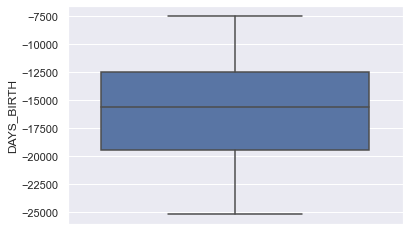

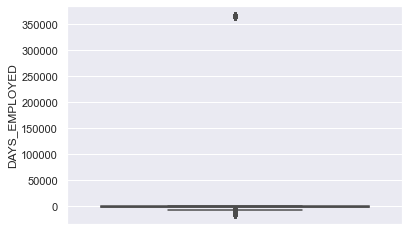

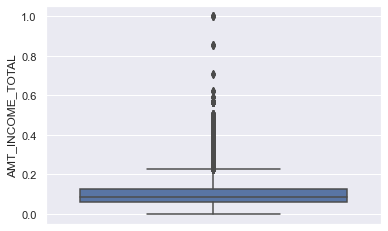

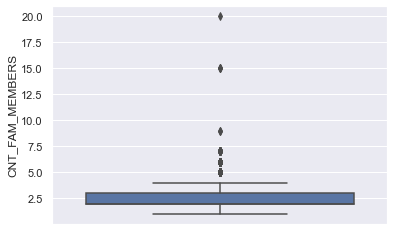

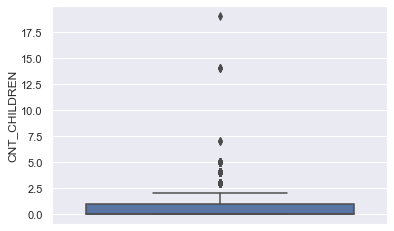

In [54]:
boxplt_Col = ["DAYS_BIRTH","DAYS_EMPLOYED","AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","CNT_CHILDREN"]
for col in boxplt_Col :
    box_plot(cust_data,col)

In [55]:
#let's check if there are any outliers in the days employed column
cust_data[cust_data['DAYS_EMPLOYED'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
7,5008812,1,0,1,0,0.165698,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,20,0
8,5008813,1,0,1,0,0.165698,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,16,0
9,5008814,1,0,1,0,0.165698,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,17,0
69,5008884,1,0,1,0,0.186047,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,365243,0,0,0,NaN,1,40,0
150,5008974,1,0,1,0,0.055233,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,5126278,1,0,0,0,0.087209,Pensioner,Secondary / secondary special,Married,House / apartment,-21244,365243,0,0,0,NaN,2,28,0
36418,5139446,1,0,1,0,0.055233,Pensioner,Secondary / secondary special,Widow,House / apartment,-21256,365243,0,1,0,NaN,1,16,0
36432,5145690,1,0,1,0,0.180233,Pensioner,Higher education,Married,House / apartment,-21590,365243,0,0,0,NaN,2,17,0
36434,5145817,1,0,1,0,0.040698,Pensioner,Secondary / secondary special,Married,House / apartment,-22011,365243,0,0,0,NaN,2,39,0


In [56]:
#validity of income type of pensioners data
cust_data[(cust_data['DAYS_EMPLOYED'] > 0) & (cust_data["NAME_INCOME_TYPE"] == 'Pensioner')].shape

(6135, 19)

In [57]:
#we will convert integer columns into positive integers
def convert_positive(df,column) :
    df[column] = df[column].apply(lambda x : x*-1)
    return df

In [58]:
#we will convert integer columns into positive ones for the continuous variables
continuous_variables = ['DAYS_BIRTH','DAYS_EMPLOYED']
for c in continuous_variables :
    cust_data = convert_positive(cust_data,c)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,NaN,2,15,0
1,5008805,0,1,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,NaN,2,14,0
2,5008806,0,1,1,0,0.055233,Working,Secondary / secondary special,Married,House / apartment,21474,1134,0,0,0,Security staff,2,29,0
3,5008808,1,0,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,4,0
4,5008809,1,0,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,26,1


In [59]:
#we will now convert days into years
cust_data['EMP_YEARS'] = cust_data["DAYS_EMPLOYED"]/365
cust_data['AGE'] = cust_data["DAYS_BIRTH"]/365
cust_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace = True)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE
0,5008804,0,1,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,15,0,12.443836,32.890411
1,5008805,0,1,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,14,0,12.443836,32.890411
2,5008806,0,1,1,0,0.055233,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3.106849,58.832877
3,5008808,1,0,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8.358904,52.356164
4,5008809,1,0,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,1,8.358904,52.356164


In [60]:
#now we will replace all the employee years of the pensioners with -1
cust_data['EMP_YEARS'] = cust_data['EMP_YEARS'].apply(lambda x : -1 if x<0 else x)

In [61]:
def bad_cust_proportions(col) :
    bad_proportions_cnt = cust_data.groupby([col,'target']).agg({'ID': 'count'})
    bad_proportions_percent = bad_proportions_cnt.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    return bad_proportions_percent

In [62]:
# Proportion of bad customers for people who own a car is < those who don't own a car
bad_cust_proportions('FLAG_OWN_CAR')

ID
FLAG_OWN_CAR target           
0            0       87.905722
             1       12.094278
1            0       87.574948
             1       12.425052

In [63]:
cust_data.corr(method ='spearman')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE
ID,1.000000,-0.013320,-0.010366,-0.102258,0.029339,-0.020869,0.080735,0.009554,-0.047782,0.027333,-0.001152,0.012387,0.007936,-0.055582
CODE_GENDER,-0.013320,1.000000,-0.361379,0.050758,-0.082463,-0.237507,-0.064994,0.026833,0.003284,-0.116829,0.002783,-0.004509,-0.045616,0.201566
FLAG_OWN_CAR,-0.010366,-0.361379,1.000000,-0.015185,0.107658,0.232685,0.021644,-0.014019,0.021750,0.159734,0.032405,0.004901,0.075748,-0.153621
FLAG_OWN_REALTY,-0.102258,0.050758,-0.015185,1.000000,-0.005483,0.025489,-0.207732,-0.066601,0.052194,-0.009851,-0.008277,-0.002605,-0.057492,0.129049
CNT_CHILDREN,0.029339,-0.082463,0.107658,-0.005483,1.000000,0.044023,0.045668,-0.017639,0.027471,0.825692,0.005137,-0.001935,0.142787,-0.380130
AMT_INCOME_TOTAL,-0.020869,-0.237507,0.232685,0.025489,0.044023,1.000000,-0.049057,-0.004904,0.081318,0.022020,0.028188,0.014470,0.162582,-0.094957
FLAG_WORK_PHONE,0.080735,-0.064994,0.021644,-0.207732,0.045668,-0.049057,1.000000,0.311644,-0.034838,0.065124,0.010828,0.003263,0.169633,-0.173292
FLAG_PHONE,0.009554,0.026833,-0.014019,-0.066601,-0.017639,-0.004904,0.311644,1.000000,0.010455,-0.001236,0.015319,0.005622,0.032285,0.030688
FLAG_EMAIL,-0.047782,0.003284,0.021750,0.052194,0.027471,0.081318,-0.034838,0.010455,1.000000,0.020658,-0.002012,-0.008707,0.024105,-0.105328
CNT_FAM_MEMBERS,0.027333,-0.116829,0.159734,-0.009851,0.825692,0.022020,0.065124,-0.001236,0.020658,1.000000,0.026125,0.001493,0.147010,-0.306064


In [64]:
cust_data.drop(['FLAG_OWN_CAR'],inplace = True,axis = 1)

In [65]:
cust_data

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE
0,5008804,0,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,15,0,12.443836,32.890411
1,5008805,0,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,14,0,12.443836,32.890411
2,5008806,0,1,0,0.055233,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3.106849,58.832877
3,5008808,1,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8.358904,52.356164
4,5008809,1,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,1,8.358904,52.356164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,1,0,0.186047,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Managers,2,11,0,6.630137,47.528767
36453,5149834,1,1,0,0.084302,Commercial associate,Higher education,Married,House / apartment,0,1,1,Medicine staff,2,23,0,3.630137,33.936986
36454,5149838,1,1,0,0.084302,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2,32,0,3.630137,33.936986
36455,5150049,1,1,0,0.165698,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Sales staff,2,9,0,1.794521,49.200000


In [66]:
#cardholders who has office apartment has the highest proportions of bad customers whereas, cardholders who live by paying rent has less number of bad customer proportions
bad_cust_proportions('NAME_HOUSING_TYPE')

ID
NAME_HOUSING_TYPE   target           
Co-op apartment     0       82.142857
                    1       17.857143
House / apartment   0       87.811847
                    1       12.188153
Municipal apartment 0       87.145390
                    1       12.854610
Office apartment    0       87.022901
                    1       12.977099
Rented apartment    0       88.695652
                    1       11.304348
With parents        0       87.950450
                    1       12.049550

In [67]:
cust_data['OCCUPATION_TYPE'] = cust_data['OCCUPATION_TYPE'].apply(lambda x : 'UNEMPLOYED' if pd.isnull(x) else x)
cust_data['OCCUPATION_TYPE'].value_counts()

UNEMPLOYED               11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

In [68]:
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)

In [69]:
cust_data

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE
0,5008804,0,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,15,0,12.443836,32.890411
1,5008805,0,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,14,0,12.443836,32.890411
2,5008806,0,1,0,0.055233,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3.106849,58.832877
3,5008808,1,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8.358904,52.356164
4,5008809,1,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,1,8.358904,52.356164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,1,0,0.186047,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Managers,2,11,0,6.630137,47.528767
36453,5149834,1,1,0,0.084302,Commercial associate,Higher education,Married,House / apartment,0,1,1,Medicine staff,2,23,0,3.630137,33.936986
36454,5149838,1,1,0,0.084302,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2,32,0,3.630137,33.936986
36455,5150049,1,1,0,0.165698,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Sales staff,2,9,0,1.794521,49.200000


In [117]:
# fit and apply the transform

X, target = oversample.fit_resample(cust_data.loc[:, cust_data.columns != 'target'], cust_data['target'])


In [118]:
X

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,EMP_YEARS,AGE
0,5008804,0,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,15,12.443836,32.890411
1,5008805,0,1,0,0.258721,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,14,12.443836,32.890411
2,5008806,0,1,0,0.055233,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,3.106849,58.832877
3,5008808,1,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,8.358904,52.356164
4,5008809,1,1,0,0.156977,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,8.358904,52.356164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47998,5116944,0,1,0,0.084302,Working,Secondary / secondary special,Married,House / apartment,0,1,0,Laborers,2,6,8.265753,53.293151
47999,5054616,1,1,0,0.171512,Pensioner,Secondary / secondary special,Married,House / apartment,0,0,0,UNEMPLOYED,2,13,-1.000000,57.742466
48000,5100007,0,0,1,0.113372,Commercial associate,Higher education,Married,House / apartment,1,0,0,Core staff,3,47,3.350685,35.726027
48001,5054643,1,0,0,0.084302,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,Accountants,2,33,10.082192,53.295890


In [81]:
len(target[])

48003

In [88]:
y =pd.DataFrame(target)

In [91]:
y[y['target']==1]

,target
4,1
12,1
44,1
55,1
76,1
...,...
47998,1
47999,1
48000,1
48001,1


In [119]:
# main(x) and target(y) columns
# normalizing amt_income_total column (Overfitting)
# on what basis did you selected these columns rather droping family status, education type, housing type, income type without finding Correlation s   
finaldf =  X[['CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                                       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'CUSTOMER_FOR_MONTHS',
                                       'EMP_YEARS', 'AGE']]


In [121]:
finaldf

,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,EMP_YEARS,AGE
0,0,1,0,0.258721,1,0,0,2,15,12.443836,32.890411
1,0,1,0,0.258721,1,0,0,2,14,12.443836,32.890411
2,0,1,0,0.055233,0,0,0,2,29,3.106849,58.832877
3,1,1,0,0.156977,0,1,1,1,4,8.358904,52.356164
4,1,1,0,0.156977,0,1,1,1,26,8.358904,52.356164
...,...,...,...,...,...,...,...,...,...,...,...
47998,0,1,0,0.084302,0,1,0,2,6,8.265753,53.293151
47999,1,1,0,0.171512,0,0,0,2,13,-1.000000,57.742466
48000,0,0,1,0.113372,1,0,0,3,47,3.350685,35.726027
48001,1,0,0,0.084302,0,0,0,2,33,10.082192,53.295890


In [113]:
# Display head for dependent variable target(y) and independent variables main(x)
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,EMP_YEARS,AGE
0,0,NaN,1,0,0.258721,1,0,0,2,15,12.443836,32.890411
1,0,NaN,1,0,0.258721,1,0,0,2,14,12.443836,32.890411
2,0,NaN,1,0,0.055233,0,0,0,2,29,3.106849,58.832877
3,1,NaN,1,0,0.156977,0,1,1,1,4,8.358904,52.356164
4,1,NaN,1,0,0.156977,0,1,1,1,26,8.358904,52.356164


In [114]:
target.head()

,target
0,0
1,0
2,0
3,0
4,1


In [115]:
# Split train and test set
from sklearn.model_selection import train_test_split

In [131]:
# Split data set to train and test set and display shape

X_train, X_test, target_train, target_test = train_test_split(finaldf, pd.DataFrame(target), test_size=0.25, random_state=4)
display(len(X_train.index))
display(len(X_test.index))
display(target_train.sum())
display(target_test.sum())
target_train.shape

36002

12001

target    12028
dtype: int64

target    3973
dtype: int64

(36002, 1)

In [132]:
# Import Logistic regression as needed
from sklearn.linear_model import LogisticRegression

# fitting the model
finaldf_reg = LogisticRegression()
finaldf_model = finaldf_reg.fit(X_train, target_train)

In [133]:
# Predict target using X_test
target_pred = finaldf_reg.predict(X_test)
target_pred

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix

# perform confusion matrix
cf_finaldf = confusion_matrix(target_test, target_pred)
cf_finaldf

array([[8028,    0],
       [3973,    0]])

Text(0.5, 257.44, 'Predicted')

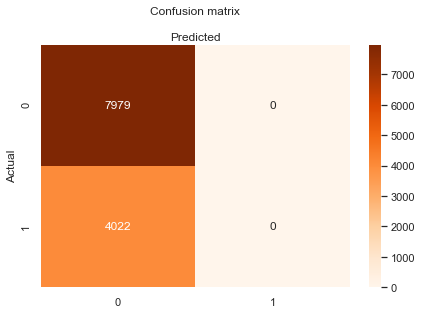

In [126]:
# class names needed to plot confusion matrix 
# sampling bias (simple random sampling)
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(cf_finaldf), annot=True, cmap='Oranges', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [135]:
# Import model evaluation metrics
from sklearn.metrics import classification_report

print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      8028
           1       0.00      0.00      0.00      3973

    accuracy                           0.67     12001
   macro avg       0.33      0.50      0.40     12001
weighted avg       0.45      0.67      0.54     12001



In [136]:
y =pd.DataFrame(target)

In [140]:
target_train[target_train['target']==0]

,target
6140,0
21921,0
5520,0
3203,0
27014,0
...,...
8039,0
29065,0
27063,0
8366,0


In [141]:
# import decision tree as needed for classifier
from sklearn.tree import DecisionTreeClassifier

finaldf_model = DecisionTreeClassifier(criterion="gini", random_state=1,max_depth=10, min_samples_leaf=3)
finaldf_model.fit(X_train, target_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

In [142]:
# predicting target variable
target_predict = finaldf_model.predict(X_test)

In [143]:
# Classification report for decision tree
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(target_test, target_predict))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81      8028
           1       0.65      0.18      0.28      3973

    accuracy                           0.70     12001
   macro avg       0.68      0.57      0.55     12001
weighted avg       0.68      0.70      0.63     12001



In [144]:
print(confusion_matrix(target_test, target_predict))

[[7645  383]
 [3257  716]]


Text(0.5, 257.44, 'Predicted')

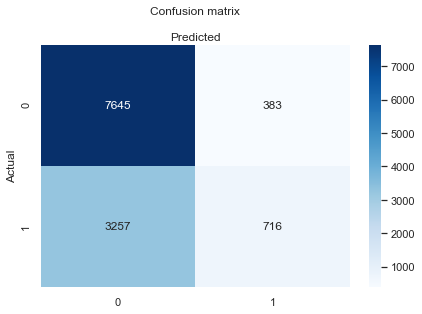

In [145]:
# confusion matrix for decision tree
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(target_test, target_predict)), annot=True, cmap='Blues', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

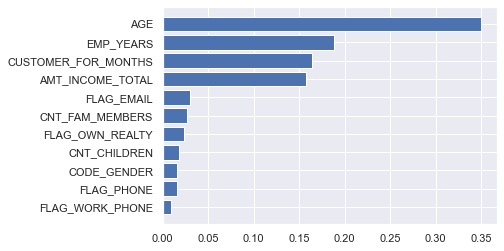

In [160]:
# Plot Feature Importance 
importances = finaldf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test,target_predict)

0.6966919423381385

In [162]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X_train,target_train)
y_pred = clf.predict(X_test)
accuracy_score(target_test,target_predict)

0.6966919423381385

[Text(0.5, 0.9166666666666666, 'X[8] <= 3.5\ngini = 0.445\nsamples = 36002\nvalue = [23974, 12028]\nclass = defaulter'),
 Text(0.25, 0.75, 'X[8] <= 1.5\ngini = 0.5\nsamples = 2741\nvalue = [1353, 1388]\nclass = good'),
 Text(0.125, 0.5833333333333334, 'X[3] <= 0.112\ngini = 0.484\nsamples = 1115\nvalue = [459, 656]\nclass = good'),
 Text(0.0625, 0.4166666666666667, 'X[9] <= 1.571\ngini = 0.47\nsamples = 814\nvalue = [308, 506]\nclass = good'),
 Text(0.03125, 0.25, 'X[10] <= 59.052\ngini = 0.496\nsamples = 304\nvalue = [139, 165]\nclass = good'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'X[9] <= 5.697\ngini = 0.443\nsamples = 510\nvalue = [169, 341]\nclass = good'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'X[9] <= 0.434\ngini = 0.5\nsamples = 301\nvalue = [151, 150]\nclass = defaulter'),
 Text(0.

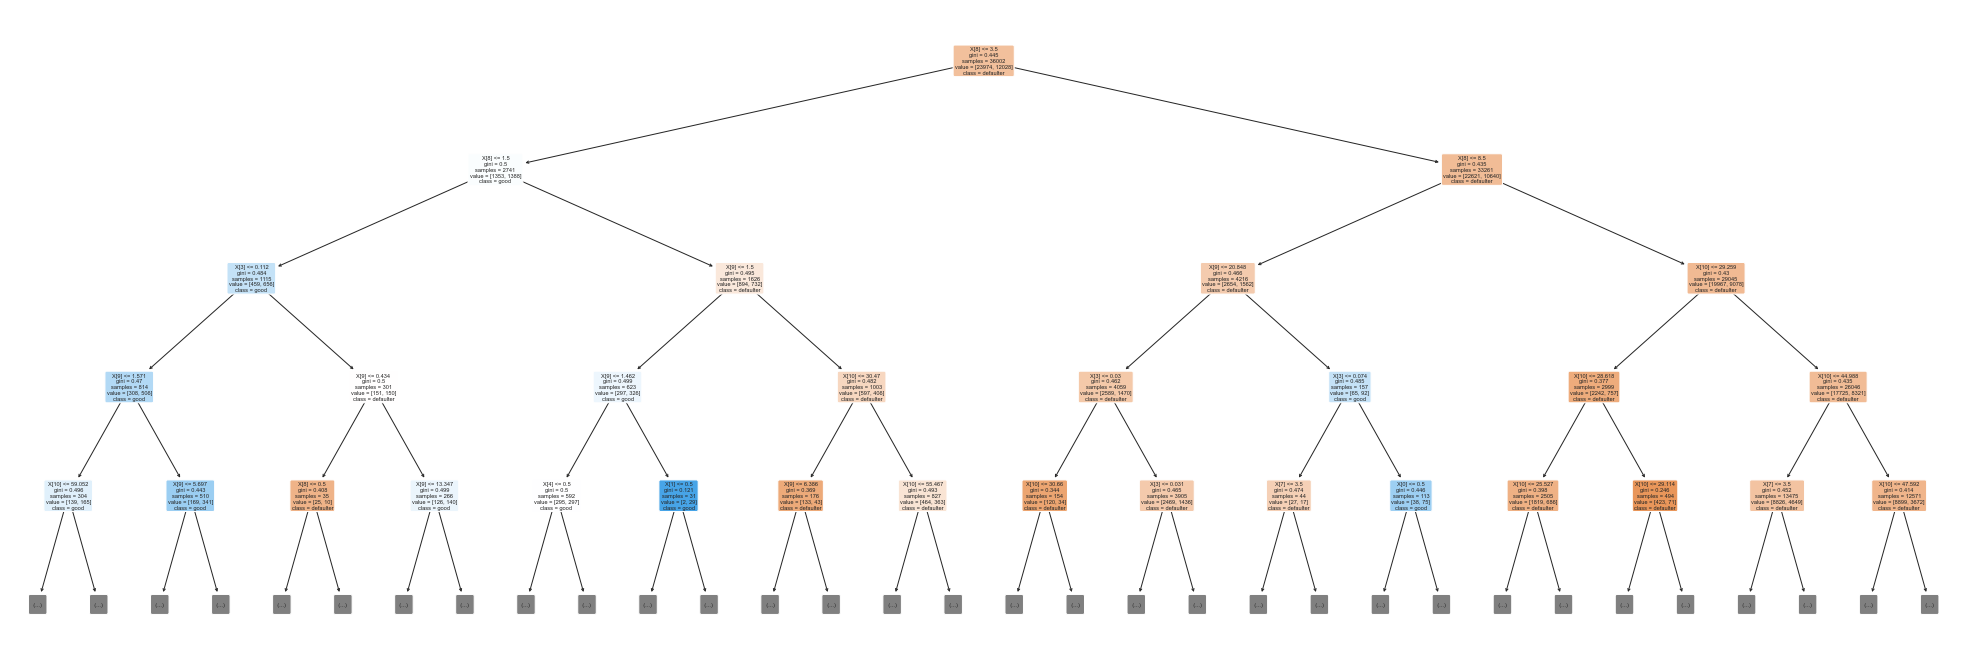

In [163]:
from sklearn import datasets
from matplotlib import pyplot as plt

plt.figure(figsize = (35,12))
plot_tree(clf,
         filled = True,
        max_depth = 4,
         rounded = True,
         class_names = ["defaulter","good"])

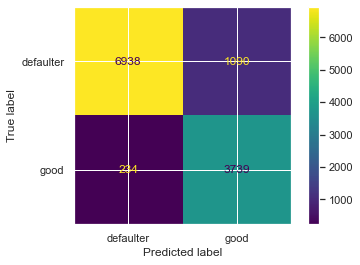

In [164]:
plot_confusion_matrix(clf,
                     X_test,
                     target_test,
                     display_labels = ["defaulter","good"])

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(X_train,target_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [153]:
target_pred1  = gb_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
round(accuracy_score(target_test,target_pred1) * 100,1)

69.1

[[7846  182]
 [3522  451]]
              precision    recall  f1-score   support

           0       0.69      0.98      0.81      8028
           1       0.71      0.11      0.20      3973

    accuracy                           0.69     12001
   macro avg       0.70      0.55      0.50     12001
weighted avg       0.70      0.69      0.61     12001



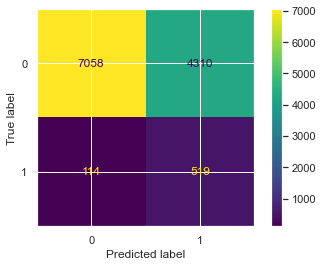

In [155]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(confusion_matrix(target_test, target_pred1))
print(classification_report(target_test, target_pred1))

plot_confusion_matrix(clf,X_test, target_pred1)
plt.show()

[14:31:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy score = 0.6845453030387201
Train f1_score = 0.17071924059875868
Train roc_auc_score = 0.5382086933552807
test accuracy score = 0.6821098241813183
test f1_score = 0.16319368282518096
test roc_auc_score = 0.53348765728207
[[7814  214]
 [3601  372]]


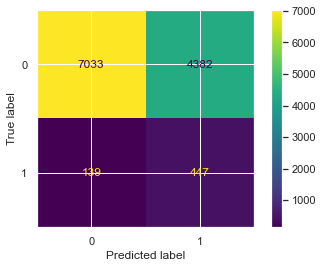

In [157]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


model=XGBClassifier(n_estimators=50,learning_rate=0.01,random_state=0)
# x,x_valid,y,y_valid=train_test_split(x_train,y_train,test_size=0.2)
model.fit(X_train,target_train)

# Calculate train accuracy 
target_train_pred = model.predict(X_train)
print(f'Train accuracy score = {accuracy_score(target_train,target_train_pred)}')
print(f'Train f1_score = {f1_score(target_train,target_train_pred)}')
print(f'Train roc_auc_score = {roc_auc_score(target_train,target_train_pred)}')

# Calculate test accuracy
target_test_pred = model.predict(X_test)
print(f'test accuracy score = {accuracy_score(target_test,target_test_pred)}')
print(f'test f1_score = {f1_score(target_test,target_test_pred)}')
print(f'test roc_auc_score = {roc_auc_score(target_test,target_test_pred)}')

target_train_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
round(accuracy_score(target_test,target_train_pred)* 100,1) 


conf_mat = confusion_matrix(target_test, target_train_pred)
print(conf_mat)

plot_confusion_matrix(clf,X_test, target_train_pred)
plt.show()

